Dataset saved as breast_cancer.csv

Model Comparison Table:

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.988263       0.986014   0.988889  0.988889   
1        Decision Tree        1.000000       0.923077   0.954023  0.922222   
2        Random Forest        1.000000       0.958042   0.956522  0.977778   
3                  SVM        0.978873       0.979021   0.988764  0.977778   

   F1 Score  
0  0.988889  
1  0.937853  
2  0.967033  
3  0.983240  

Model comparison table saved as model_comparison.csv


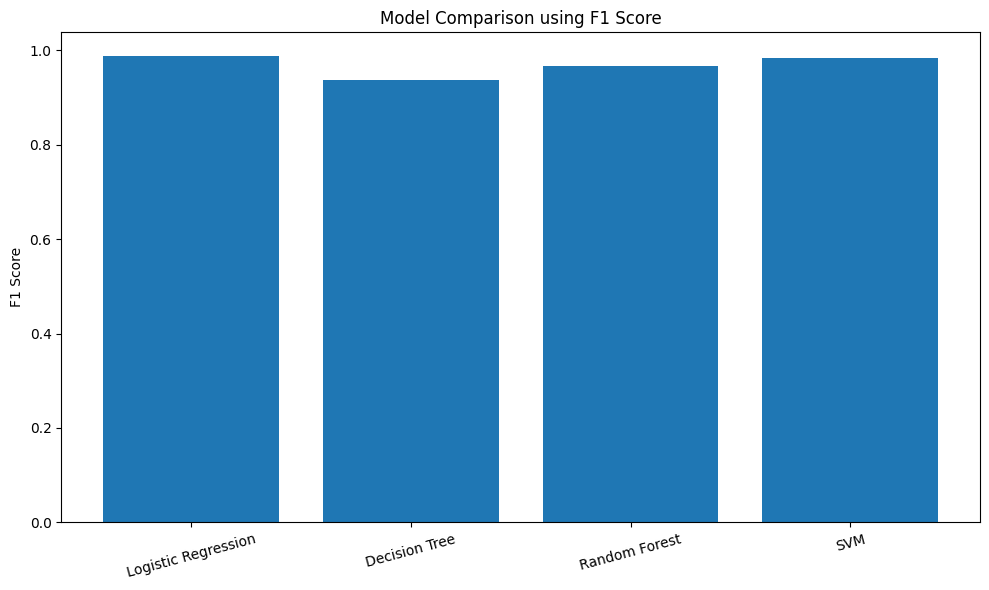

Comparison plot saved as model_comparison.png

Best Model Selected: Logistic Regression
Best model saved as best_model.pkl


In [1]:
# ==========================================
# TASK 14: MODEL COMPARISON & BEST MODEL SELECTION
# Dataset: Breast Cancer (Auto-generated CSV)
# ==========================================

# ---------- 1. IMPORT LIBRARIES ----------
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# ---------- 2. CREATE & SAVE DATASET ----------
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target   # 0 = Malignant, 1 = Benign

df.to_csv("breast_cancer.csv", index=False)
print("Dataset saved as breast_cancer.csv")


# ---------- 3. LOAD DATASET ----------
df = pd.read_csv("breast_cancer.csv")

X = df.drop("target", axis=1)
y = df["target"]


# ---------- 4. TRAIN-TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


# ---------- 5. DEFINE MODELS ----------
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "Decision Tree": DecisionTreeClassifier(random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(kernel="rbf"))
    ])
}


# ---------- 6. EVALUATION FUNCTION ----------
def evaluate_model(name, model):
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    return {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Precision": precision_score(y_test, test_pred),
        "Recall": recall_score(y_test, test_pred),
        "F1 Score": f1_score(y_test, test_pred)
    }


# ---------- 7. TRAIN & EVALUATE ALL MODELS ----------
results = []

for name, model in models.items():
    results.append(evaluate_model(name, model))

results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)


# ---------- 8. SAVE COMPARISON TABLE ----------
results_df.to_csv("model_comparison.csv", index=False)
print("\nModel comparison table saved as model_comparison.csv")


# ---------- 9. PLOT & SAVE COMPARISON ----------
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["F1 Score"])
plt.title("Model Comparison using F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=15)
plt.tight_layout()

plt.savefig("model_comparison.png")
plt.show()

print("Comparison plot saved as model_comparison.png")


# ---------- 10. SELECT BEST MODEL ----------
best_model_name = results_df.sort_values("F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print("\nBest Model Selected:", best_model_name)


# ---------- 11. RETRAIN & SAVE BEST MODEL ----------
best_model.fit(X_train, y_train)
joblib.dump(best_model, "best_model.pkl")

print("Best model saved as best_model.pkl")
